# <font size='6' color='FF8C00' face='Courier New'>**Real Estate Listings Berlin (DE) April 2023**</font>
<hr style="margin-bottom: 40px;">


<font size='5' face='Courier New'>**План выполнения проекта**</font>

- 1. Загрузка данных и изучение общей информации

- 2. Предобработка данных
  
  - 2.1 Проверка дубликатов
  
  - 2.2 Проверка пропусков

  - 2.3 Изменение типов данных
    
  - 2.4 Анализ датафрейма на аномалии

- 3. Добавление дополнительных признаков

  - 3.1 Цена за квартиру в миллионах

  - 3.2 Тип энергии

  - 3.3 Система отопления в квартирах

- 4. Исследовательский анализ данных

  - 4.1 Анализ параметров объектов недвижимости
  
      - 4.1.1 Жилая площадь
      - 4.1.2 Количество комнат
      - 4.1.3 Параметр цен на квартиры
      - 4.1.4 Параметр тип энергии
      - 4.1.5 Параметр система отопления
      - 4.1.6 Параметры объектов. Итог
   
  - 4.2 Анализ факторов, влияющих на общую стоимость квартиры

      - 4.2.1 Жилая площадь
      - 4.2.2 Количество комнат
      - 4.2.3 Тип энергии в квартирах
      - 4.2.4 Система отопления в квартирах
      - 4.2.5 Год постройки домов
      - 4.2.6 Какие факторы влияют. Итог
    
- 5. Вывод на основании проведенного анализа


# <font size='6' face='Courier New'>**EDA**</font>

## 1.Загрузка данных и изучение общей информации

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use ('dark_background')

pd.set_option('display.max_columns', None)

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('real_estate_listings_clean.csv')

In [4]:
# получим общую информацию о данных
def berlin_dataframe_info(df):
    try:
        display('Первые пять строк данных:')
        display(df.head(5))
        display('Описание данных:')
        display(df.describe())
        display('Общая информацию о датафрейме')
        display(df.info())
        display('Графическое отображение количества пропусков')
        display(pd.DataFrame(round(df.isna().mean() * 100, 1)).style.background_gradient('Greys'))
    except:
        return 'Проверьте параметры'

In [5]:
berlin_dataframe_info(df)

'Первые пять строк данных:'

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063


'Описание данных:'

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
count,4.942000e+03,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000
mean,5.654009e+05,85.067321,2.805544,5.891574,11954.461554,1944.344193,3.401255,6401.269284
std,6.107572e+05,58.315922,1.582906,121.004862,1628.058346,143.609751,29.137154,3183.956274
min,3.495000e+04,13.000000,1.000000,-3.500000,1099.000000,1.000000,1.000000,956.521739
25%,2.590000e+05,54.070000,2.000000,3.570000,10589.000000,1910.000000,1.000000,4537.537879
50%,3.899000e+05,72.740000,3.000000,3.570000,12161.000000,1956.000000,1.000000,5843.852267
75%,6.690000e+05,101.000000,3.000000,3.570000,13088.000000,1994.000000,3.000000,8063.468346
max,1.590000e+07,970.000000,26.000000,7996.000000,77933.000000,2026.000000,2023.000000,87739.070663


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
 10  price_per_area     4942 non-null   float64
dtypes: float64(8), object(3)
memory usage: 424.8+ KB


None

'Графическое отображение количества пропусков'

,0
url,0.000000
energy,0.000000
heating,0.000000
price,0.000000
area,0.000000
rooms,0.000000
fee,0.000000
zipcode,0.000000
construction_year,0.000000
level,0.000000


In [6]:
# Определим количества уникальных значений для каждого столбца
dict_count = {}
for i in list(df.columns):
  dict_count[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict_count, index=['count']).transpose()

,count
url,4942
energy,20
heating,23
price,1430
area,2119
rooms,21
fee,68
zipcode,190
construction_year,155
level,20


## 2.Предобработка данных

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'fee'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'construction_year'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'price_per_area'}>, <Axes: >]],
      dtype=object)

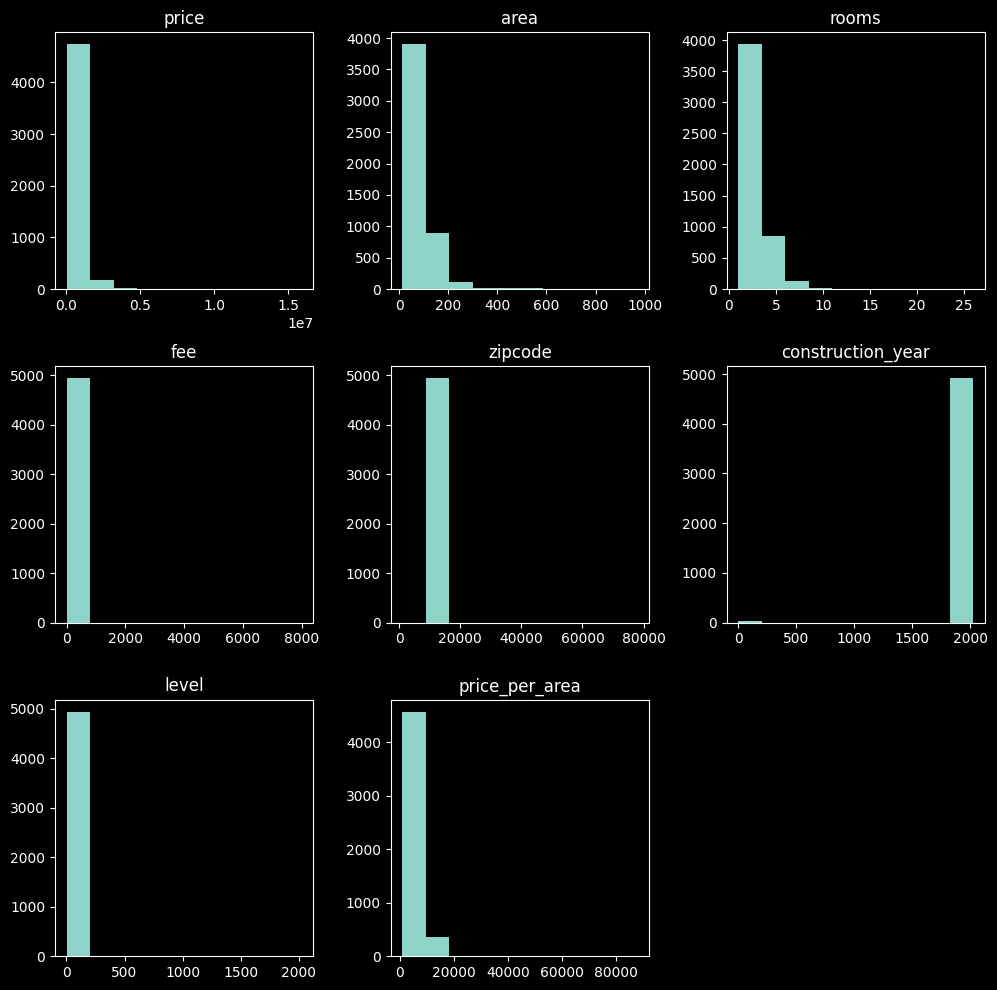

In [7]:
df.hist(figsize=(12, 12), grid = False)

### 2.1 Проверка дубликатов

In [8]:
# проверим на дубликаты
print(f'Количество дубликатов в наборе данных - {df.duplicated().sum()}')

Количество дубликатов в наборе данных - 0


Посмотрим на названия и количество строк в колонках `Тип энергии` и `Система отопления`

In [9]:
df['energy'].value_counts()

na                           2112
Gas                          1414
Fernwärme                     829
Öl                            413
Luft-/                         34
Fernwärme,                     28
Elektro,                       24
Fußbodenheizung,               24
Elektro                        15
Solar                          12
Blockheizkraftwerk,            11
Gas,                           10
Erdwärme                        5
Pellets                         3
Flüssiggas                      2
Blockheizkraftwerk              2
Holz,                           1
Niedrigenergiehaus              1
Erdwärme,                       1
Fußbodenheizung, offener        1
Name: energy, dtype: int64

In [10]:
df['heating'].value_counts()

na                           2112
Zentralheizung               1839
Etagenheizung                 366
Fußbodenheizung,              206
Fußbodenheizung               174
Heizungsart                    70
Kamin,                         34
Wärmepumpe                     30
Wasser-                        24
Kf                             17
Kamin                          15
Niedrigenergiehaus             12
Fußbodenheizung, offener       11
Etagenheizung, offener          8
Etagenheizung,                  6
Heizungsartoffener              4
Luft-/                          3
Wärmepumpe,                     3
Fertighaus                      3
Minergie zertifiziert           2
Ofen,                           1
Wärmepumpe, offener             1
Kohle,                          1
Name: heating, dtype: int64